#Task 1: Define the Problem

In [1]:
# asking machine learning model algorthim based on the data
# to tell us who survived or did not

#Task 2a: Install the Needed Libraries

#Task 2b: Import the Needed Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly
# cufflinks is used to make prettier graphs
# Interaction with your charts
import cufflinks as cf

#Task 3: Load the Data

In [3]:
train = pd.read_csv('https://raw.githubusercontent.com/glopez21/ML-Data/main/titanic_train.csv')

#Task 4: Perform Data Exploratory Analysis (EDA)

##Show the data

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##Get Data Info

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##Find Missing Values

In [6]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

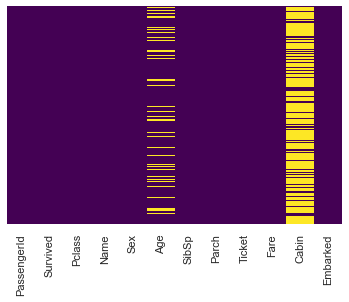

In [7]:
# Quick view to see if there are missing values using seaborn
# going create a heatmap
# take away y axis label
# This tells us what columns there is missing data
# This will cause problems with our models which wont make it accurate
sns.heatmap(train.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

#Task 5: Perform Data Cleaning

<AxesSubplot:xlabel='Survived', ylabel='count'>

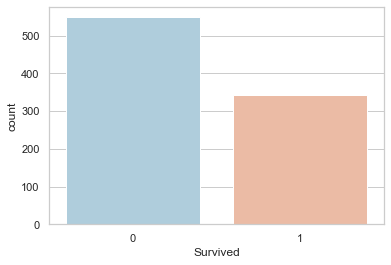

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=train, palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

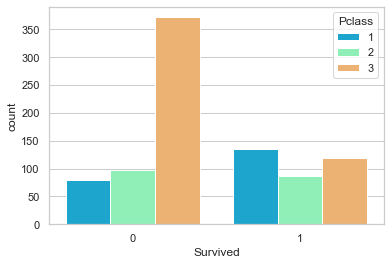

In [9]:
# who susns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass',data=train, palette='rainbow')

<Figure size 1224x864 with 0 Axes>

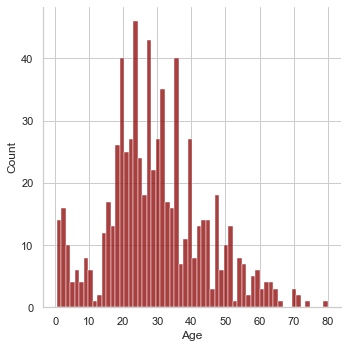

In [10]:
# age across of all passengers
plt.figure(figsize=(17, 12))
sns.displot(train['Age'].dropna(), kde=False, color='darkred', bins=60)

<AxesSubplot:>

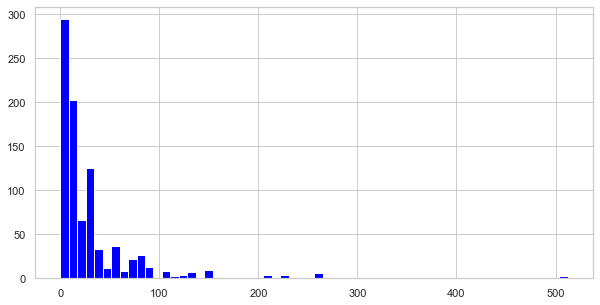

In [11]:
# who paid the most 
plt.figure(figsize=(12, 7))
train['Fare'].hist(color='blue', bins=60, figsize=(10,5))

#Task 6: Visualize Cleaned up Dataset

In [12]:
cf.go_offline()

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

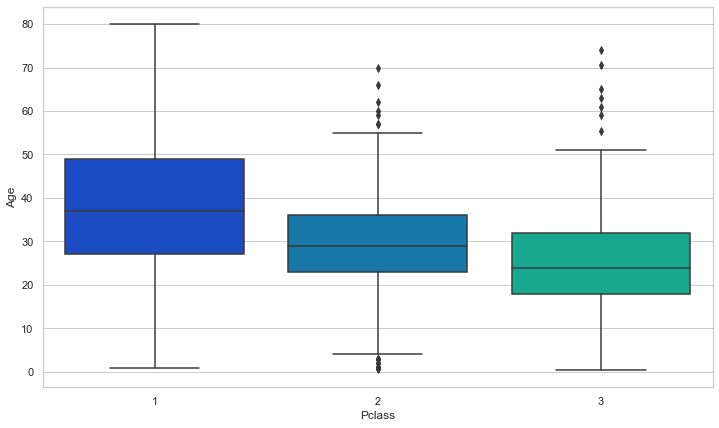

In [13]:
# Create a chart that will give us some type of understanding how we approach the missing values
# Using a box plot
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')
# each box is the main distrbution of the passengers on the boat
# in each box you have the top middle and bottom lines
# the middle lines will give us the averages of ages by class
# can use this to fill in the missing values

In [14]:
# the name of the function is inpute_age
# in order for it to work in takes in columns
# the columns are age and Pclass
# the cols means nothing just a place holder
def inpute_age(cols):
  #defining a function to do
  Age = cols[0]

  Pclass = cols[1]
# we are inputting the age averages from the box plots
# in this column if you have a missing value in column Age i want you to do something
  if pd.isnull(Age):
# first thing check pclass and return 37 which is the median age 
    if Pclass == 1:
      return 37
    elif Pclass == 2:
      return 29
    else:
      return 24
  else:
    return Age

<AxesSubplot:>

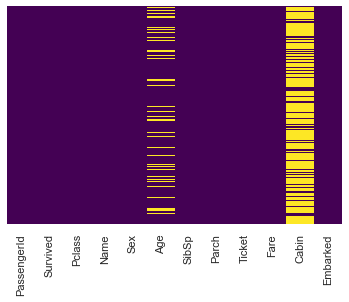

In [15]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [16]:
# apply the function using .apply()
# if we are only changing Age column why do we need Age and Pclass columns
# Because the function requires Pclass 
train['Age'] = train[['Age', 'Pclass']].apply(inpute_age, axis=1)

<AxesSubplot:>

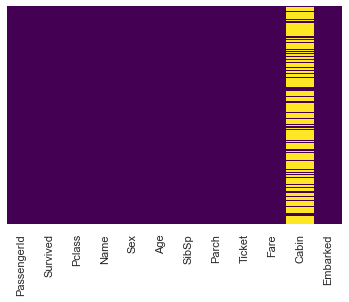

In [17]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [18]:
# we do not neet the cabin column because its irrevelant 
# nobody was in there cabins while the ship was going down
train.drop('Cabin', axis=1, inplace=True)

<AxesSubplot:>

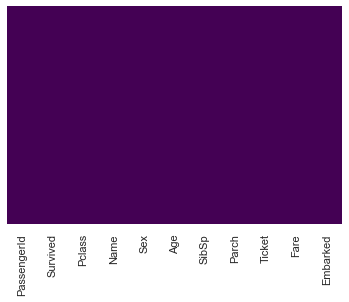

In [19]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [20]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [21]:
# in case there are any more missing values
# we can drop them 
train.dropna(inplace=True)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [23]:
# changing string data to where a machine learning model can deal with it
# machine learning only understands sentences in neural learning
# encoding in numbers using get_dummies aka dummy numbers
# do not use pd.numeric
# drop the orginal column once you make the change drop_first=True
sex = pd.get_dummies(train['Sex'], drop_first=True)
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [24]:
# drops columns we do not need
# Sex and Embarked are getting replaced
train.drop(['Sex','Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [25]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [26]:
# adding the dataframe and new df variables that have the get dummy data
train = pd.concat([train, sex, embark], axis=1)

In [27]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


#Task 7: Conceptualize the problem

In [28]:
# We need to find out who survied or not!

#Task 8: Perform Data-Split

In [29]:
# split the data
from sklearn.model_selection import train_test_split

In [30]:
# drop the column Survived before you do the split
# because we want the algorithm to tell us who survived without telling it who survived
# on the Y use the Survived column
# test size 30% do not go 50% that will be overfitting (max 35%)
# keep it between 20-30%
# random_state can be whatever you want just keep it consistent between runs to get similar outcomes
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),
                                                    train['Survived'], test_size=0.30,
                                                    random_state=101)

In [31]:
# take a look of the shape of the split data 
# you do not have to use uppercase
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(622, 9)
(267, 9)
(622,)
(267,)


#Task 9: Choose the ML Method to follow

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
# define the model because being able to use it
logmodel = LogisticRegression()

#Task 10: Train the ML Model

In [34]:
logmodel.fit(X_train,y_train)

/Users/pps/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

#Task 11: Test the Model

In [35]:
# have to measure the accuracy of the model
predictions = logmodel.predict(X_test)

In [36]:
# pull in a way to see how to model trained 
from sklearn.metrics import classification_report

In [37]:
# only look at f1-score column accuracy row .80 accuracy 
# anything above 80% accuracy is good
# neural networks should be higher
# too high can be overfitting
# a ml that is overfit means it knows too much about the data
# it is so focus on that data it will not be able to analyze any new data
# underfitting dont know enough to be reliable 
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       163
           1       0.81      0.62      0.71       104

    accuracy                           0.80       267
   macro avg       0.80      0.77      0.78       267
weighted avg       0.80      0.80      0.79       267



In [38]:
# Will tell us who survived and who did not
print(logmodel.score(X_test,y_test))
pp = logmodel.predict(X_test)
print("Survived", sum(pp!=0))
print("NOT Survived", sum(pp==0))

0.797752808988764
Survived 80
NOT Survived 187


#### Another take

In [55]:
# change the test size 3 different times and 3 different seeds
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),
                                                    train['Survived'], test_size=0.20,
                                                    random_state=11)

In [56]:
logmodel.fit(X_train,y_train)

/Users/pps/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [57]:
predictions = logmodel.predict(X_test)

In [58]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       107
           1       0.82      0.75      0.78        71

    accuracy                           0.83       178
   macro avg       0.83      0.82      0.82       178
weighted avg       0.83      0.83      0.83       178



In [59]:
print(logmodel.score(X_test,y_test))
pp = logmodel.predict(X_test)
print("Survived", sum(pp!=0))
print("NOT Survived", sum(pp==0))

0.8314606741573034
Survived 65
NOT Survived 113


In [60]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),
                                                    train['Survived'], test_size=0.20,
                                                    random_state=21)

In [61]:
logmodel.fit(X_train,y_train)

/Users/pps/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [62]:
predictions = logmodel.predict(X_test)

In [63]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       126
           1       0.61      0.58      0.59        52

    accuracy                           0.77       178
   macro avg       0.72      0.71      0.72       178
weighted avg       0.77      0.77      0.77       178



In [64]:
print(logmodel.score(X_test,y_test))
pp = logmodel.predict(X_test)
print("Survived", sum(pp!=0))
print("NOT Survived", sum(pp==0))

0.7696629213483146
Survived 49
NOT Survived 129


In [65]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),
                                                    train['Survived'], test_size=0.20,
                                                    random_state=3)

In [66]:
logmodel.fit(X_train,y_train)

/Users/pps/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [67]:
predictions = logmodel.predict(X_test)

In [68]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       110
           1       0.73      0.56      0.63        68

    accuracy                           0.75       178
   macro avg       0.75      0.72      0.72       178
weighted avg       0.75      0.75      0.74       178



In [69]:
print(logmodel.score(X_test,y_test))
pp = logmodel.predict(X_test)
print("Survived", sum(pp!=0))
print("NOT Survived", sum(pp==0))

0.7528089887640449
Survived 52
NOT Survived 126
